<a href="https://colab.research.google.com/github/thultm/bee-swarm/blob/main/split_audio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Number of files

In [1]:
# Number of files
from os import listdir
path = '/content/drive/MyDrive/upload_data'
print(len(listdir(path + '/swarm')))
print(len(listdir(path + '/no swarm')))
print(len(listdir(path + '/prep')))

17523
18232
18740


# Visualize

In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [3]:
sr = 44100

In [4]:
def get_audio_from_folder(path, folder_name, sr=sr, num_files=10000):
    audio_files = []
    file_names = os.listdir(path + "/" + folder_name)
    count = 0
    for i in range(len(file_names)):
      # If length is less than 2 seconds, skip
        if len(librosa.load(path + "/" + folder_name + "/" + file_names[i], sr=sr)[0]) < 2 * sr:
            continue
        else:
          audio_files.append(librosa.load(path + "/" + folder_name + "/" + file_names[i], sr=sr)[0])
          count += 1
        if count == num_files:
            break
    audio_files = np.array(audio_files)
    return audio_files

(14000, 88200)


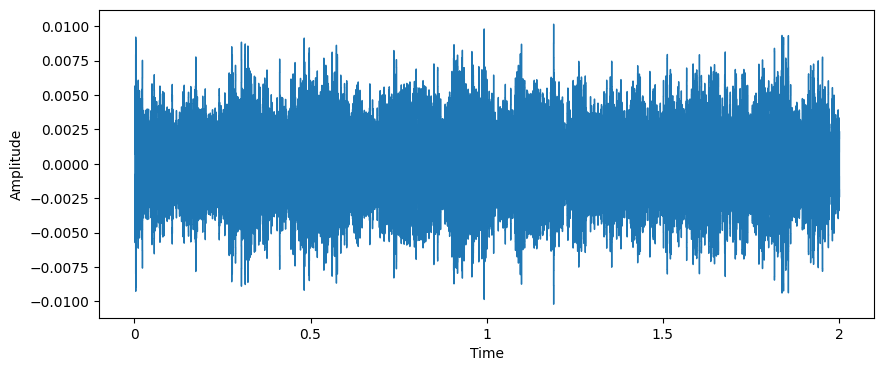

In [ ]:
swarm = get_audio_from_folder(path, 'swarm', sr=sr, num_files=14000)

print(swarm.shape)
plt.figure(figsize=(10, 4))
librosa.display.waveshow(swarm[0], sr=sr)
plt.ylabel('Amplitude')
plt.show()

(14000, 88200)


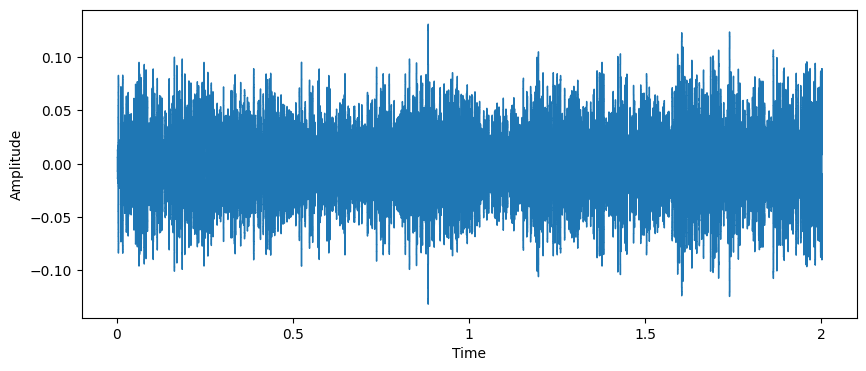

In [ ]:
no_swarm = get_audio_from_folder(path, 'no swarm', sr=sr, num_files=14000)

print(no_swarm.shape)
plt.figure(figsize=(10, 4))
librosa.display.waveshow(no_swarm[0], sr=sr)
plt.ylabel('Amplitude')
plt.show()

(14000, 88200)


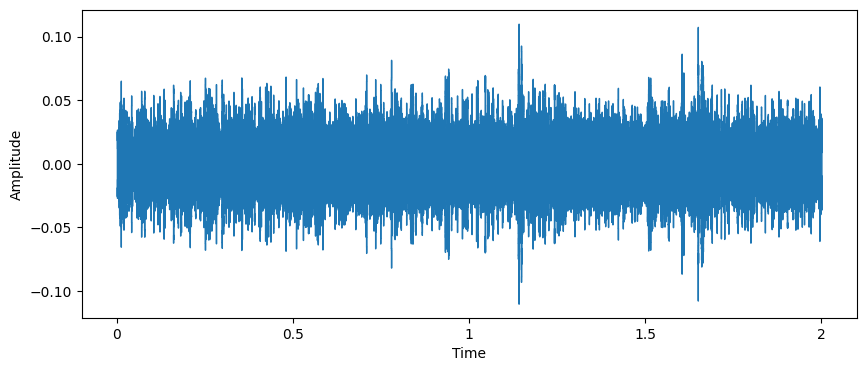

In [5]:
prep = get_audio_from_folder(path, 'prep', sr=sr, num_files=14000)

print(prep.shape)
plt.figure(figsize=(10, 4))
librosa.display.waveshow(prep[0], sr=sr)
plt.ylabel('Amplitude')
plt.show()

# Feature extraction - Chroma Extraction

In [6]:
hop_length = 512

def get_chroma(audio_files, n_fft=2048, hop_length=512):
    chroma = []
    for audio in audio_files:
        chroma.append(librosa.feature.chroma_stft(y=audio, sr=sr, n_fft=n_fft, hop_length=hop_length))
    chroma = np.array(chroma)
    return chroma

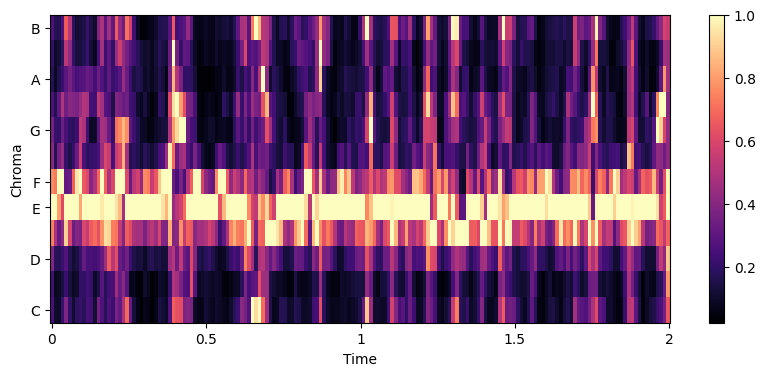

In [ ]:
swarm_chroma = get_chroma(swarm)

# Plotting Chroma Features
plt.figure(figsize=(10, 4))
librosa.display.specshow(swarm_chroma[0], y_axis='chroma', x_axis='time', sr=sr)
plt.xlabel('Time')
plt.ylabel('Chroma')
plt.colorbar()
plt.show()

In [ ]:
swarm_chroma.shape

(14000, 12, 173)

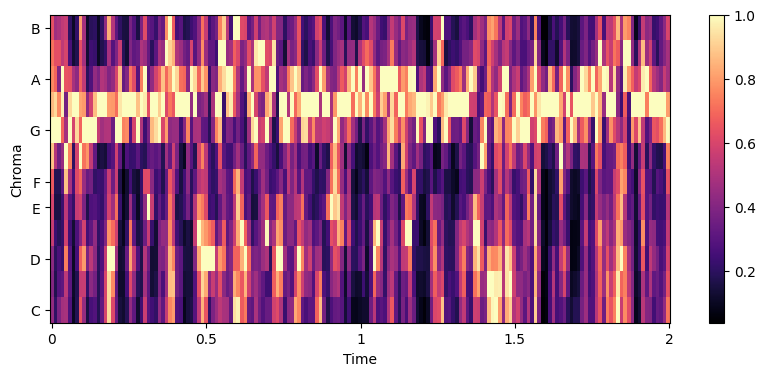

In [ ]:
no_swarm_chroma = get_chroma(no_swarm)

# Plotting Chroma Features
plt.figure(figsize=(10, 4))
librosa.display.specshow(no_swarm_chroma[0], y_axis='chroma', x_axis='time', sr=sr)
plt.xlabel('Time')
plt.ylabel('Chroma')
plt.colorbar()
plt.show()

In [8]:
no_swarm_chroma.shape

(14000, 12, 173)

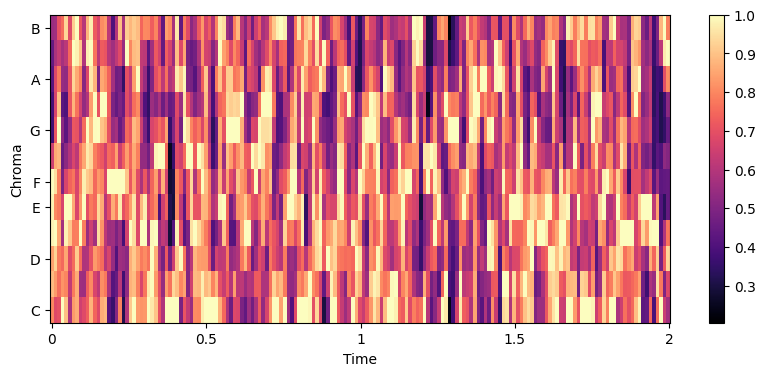

In [7]:
prep_chroma = get_chroma(prep)

# Plotting Chroma Features
plt.figure(figsize=(10, 4))
librosa.display.specshow(prep_chroma[0], y_axis='chroma', x_axis='time', sr=sr)
plt.xlabel('Time')
plt.ylabel('Chroma')
plt.colorbar()
plt.show()

In [8]:
prep_chroma.shape

(14000, 12, 173)

In [ ]:
np.save(path + '/swarm_chroma.npy', swarm_chroma)

In [9]:
np.save(path + '/no_swarm_chroma.npy', no_swarm_chroma)

In [9]:
np.save(path + '/prep_chroma.npy', prep_chroma)